In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy_train=[]
recall_train=[]
precision_train=[]
f1_score_train=[]
specifity_train=[]
senstivity_train=[]
accuracy_test=[]
recall_test=[]
precision_test=[]
f1_score_test=[]
specifity_test=[]
senstivity_test=[]
best_hyper_parameter=[]
def score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test):
  accuracy_train.append(accuracy_score(y_train,y_pred_train))
  recall_train.append(recall_score(y_train,y_pred_train))
  precision_train.append(precision_score(y_train,y_pred_train))
  f1_score_train.append(f1_score(y_train,y_pred_train))
  tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
  specificity1 = tn / (tn+fp)
  senstivity1= tp / (tp + fn)
  specifity_train.append(specificity1)
  senstivity_train.append(senstivity1)
  accuracy_test.append(accuracy_score(y_test,y_pred_test))
  recall_test.append(recall_score(y_test,y_pred_test))
  precision_test.append(precision_score(y_test,y_pred_test))
  f1_score_test.append(f1_score(y_test,y_pred_test))
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
  specificity1 = tn / (tn+fp)
  senstivity1= tp / (tp + fn)
  specifity_test.append(specificity1)
  senstivity_test.append(senstivity1)

In [ ]:
df=pd.read_csv("/home/22n0457/Data_Q1.txt",header=None)

In [ ]:
a=[[] for i in range(df.shape[0])]
y=[]

In [ ]:
for i in range(df.shape[0]):
  c=df.iloc[i,-1].split(" ")
  y.append(float(c[0]))
  for j in c[1:]:
    d=j.split(':')
    a[i].append(d)

In [ ]:
a=np.array(a)

<ipython-input-7-3bbcc7de3f3d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a=np.array(a)


In [ ]:
f=[]
for i in a:
  d=np.array(i,dtype='float64')
  f.append(d.max(axis=0)[0])
s=max(f)

In [ ]:
df.shape[0]

4143

In [ ]:
s

54877.0

In [ ]:
t=[]
for i in range(df.shape[0]):
  for j in a[i]:
    t.append(int(j[0]))

In [ ]:
df=pd.DataFrame(np.zeros((4143,max(t))))
for i in range(df.shape[0]):
  for j in a[i]:
    df.iloc[i,int(j[0])-1]=float(j[1])

In [ ]:
df

0      1      2      3      4      5      6      7      8      9      \
0       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4138    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
4139    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4140    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
4141    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4142    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   

      ...  54867  54868  54869  54870  54871  54872  54873  54874  54875  \
0     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4138  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4139  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4140  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4141  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
4142  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      54876  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
4138    0.0  
4139    0.0  
4140    0.0  
4141    1.0  
4142    0.0  

[4143 rows x 54877 columns]

In [ ]:
target=pd.DataFrame({'label':y,2:np.ones(len(y))})

In [ ]:
print('number of unique label is ',target.nunique())

number of unique label is  label    2
2        1
dtype: int64


In [ ]:
df=df.to_numpy()
np.linalg.matrix_rank(df)

366

In [ ]:
print('number of sample with label -1 is',target.groupby('label').count().iloc[0,0])
print('number of sample with label 1 is',target.groupby('label').count().iloc[1,0])

number of sample with label -1 is 1933
number of sample with label 1 is 2210


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2,stratify=y, random_state=42)

In [ ]:
print('number of sample with label -1 in training set',y_train.count(-1))
print('number of sample with label 1 in training set',y_train.count(1))

number of sample with label -1 in training set 1546
number of sample with label 1 in training set 1768


In [ ]:
print('number of sample with label -1 in test set',y_test.count(-1))
print('number of sample with label 1 in test set',y_test.count(1))

number of sample with label -1 in test set 387
number of sample with label 1 in test set 442


The range of the penalty constant depends on the implementation of the logistic regression algorithm. However, typically the penalty constant, also known as the regularization strength, is a hyperparameter that can be tuned using cross-validation techniques. The optimal range for the penalty constant may depend on the dataset and the specific problem at hand.


the penalty constant is controlled by the C parameter. The default value for C is 1.0, and typical values we choose greater than zero so i have choosen between 10^-5 to 10^5  A smaller value of C results in stronger regularization, while a larger value of C results in weaker regularization. However, the optimal range of C may depend on the dataset and should be tuned using cross-validation.

In [ ]:
pipeline = make_pipeline(LogisticRegression(penalty='l2', random_state=1))
param_range = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e5]
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             cv=5,n_jobs=-1,
                                              param_name='logisticregression__C', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')


train scores: [[0.53376084 0.53338363 0.53338363 0.53338363 0.53355958]
 [0.76386269 0.76122218 0.77216145 0.77367031 0.76357466]
 [0.84534138 0.83930592 0.83968314 0.85062241 0.83974359]
 [0.94266315 0.93511882 0.93851377 0.9370049  0.93702866]
 [0.98792908 0.9883063  0.98679743 0.98868352 0.98944193]
 [0.99811392 0.9977367  0.99849114 0.99849114 0.99811463]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]]
val scores: [[0.53242836 0.53393665 0.53393665 0.53393665 0.53323263]
 [0.76923077 0.75263952 0.76168929 0.74962293 0.7673716 ]
 [0.82202112 0.83861237 0.81749623 0.80693816 0.82628399]
 [0.86726998 0.89140271 0.90346908 0.87179487 0.89728097]
 [0.88235294 0.90497738 0.92156863 0.89894419 0.90785498]
 [0.88838612 0.89291101 0.92307692 0.90196078

In [ ]:
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.53349426 0.76689826 0.84293929 0.93806586 0.98823165 0.9981895
 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844]
average val scores : [0.53349419 0.76011082 0.82227037 0.88624352 0.90313962 0.90223374
 0.90042378 0.89982046 0.89831034 0.89861337 0.90102664]


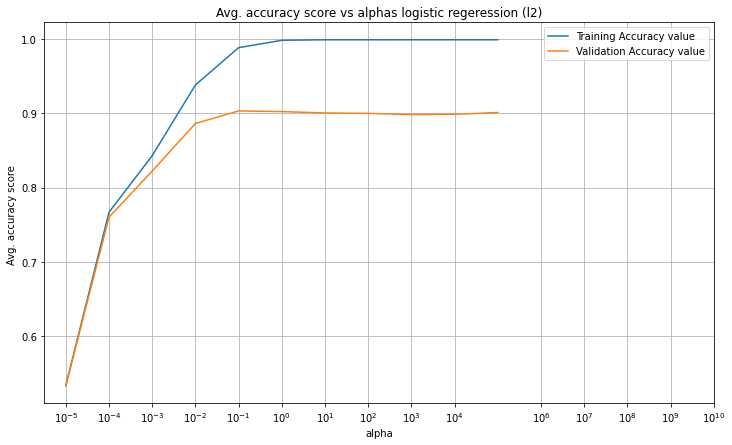

In [ ]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training Accuracy value")
plt.plot(param_range, avg_val_scores,label = "Validation Accuracy value")
plt.xlabel('alpha')
plt.ylabel('Avg. accuracy score ')
plt.title("Avg. accuracy score vs alphas logistic regeression (l2)")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks( [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10])
plt.show()

In [ ]:
best_alpha = param_range[np.argmax(avg_val_scores)]
print('best_hyper_parameter from 5 fold CV:',best_alpha)
best_hyper_parameter.append(best_alpha)

best_hyper_parameter from 5 fold CV: 0.1


In [ ]:
logistic_l2 = LogisticRegression(penalty='l2', C = best_alpha, random_state=1)

logistic_l2.fit(X_train, y_train)
y_pred_train =logistic_l2.predict(X_train)
y_pred_test=logistic_l2.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)

In [ ]:
train_score = logistic_l2.score(X_train, y_train)

test_score = logistic_l2.score(X_test, y_test)

print('Train accuracy:',train_score)
print('Test accuracy:',test_score)

Train accuracy: 0.987628243814122
Test accuracy: 0.8914354644149578


#  Logistic regression with L1 regularizer

 L1 penalty, C controls the sparsity of the coefficients, with lower values of C leading to more coefficients set to zero. This can be useful for feature selection, where the aim is to identify the most important predictors in the model.
 
 since regression constant is always greater than 0 so i have choosen it from 10^-5 to 10^5

In [ ]:
pipeline = make_pipeline(LogisticRegression(penalty='l1',solver='saga', random_state=1))
param_range = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e5]
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             cv=5,n_jobs=-1,
                                              param_name='logisticregression__C', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')


train scores: [[0.53376084 0.53338363 0.53338363 0.53338363 0.53355958]
 [0.53376084 0.53338363 0.53338363 0.53338363 0.53355958]
 [0.53376084 0.53338363 0.53338363 0.53338363 0.53355958]
 [0.7219917  0.72764994 0.72538665 0.7336854  0.72285068]
 [0.8879668  0.88004527 0.88494908 0.88872124 0.88084465]
 [0.96906828 0.96642776 0.96454168 0.96831384 0.96794872]
 [0.986043   0.98642022 0.98528857 0.98679743 0.98793363]
 [0.98755187 0.9883063  0.98566579 0.98792908 0.98906486]
 [0.98755187 0.98868352 0.98566579 0.98792908 0.98906486]
 [0.98755187 0.98868352 0.98566579 0.98792908 0.98906486]
 [0.98755187 0.98868352 0.98566579 0.98792908 0.98906486]]
val scores: [[0.53242836 0.53393665 0.53393665 0.53393665 0.53323263]
 [0.53242836 0.53393665 0.53393665 0.53393665 0.53323263]
 [0.53242836 0.53393665 0.53393665 0.53393665 0.53323263]
 [0.74358974 0.72096531 0.73001508 0.69683258 0.74018127]
 [0.85671192 0.88989442 0.87481146 0.84917044 0.87009063]
 [0.87933635 0.90196078 0.90497738 0.88687783

In [ ]:
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.53349426 0.53349426 0.53349426 0.72631287 0.88450541 0.96726006
 0.98649657 0.98770358 0.98777902 0.98777902 0.98777902]
average val scores : [0.53349419 0.53349419 0.53349419 0.7263168  0.86813577 0.89499301
 0.90343992 0.9028366  0.9028366  0.9028366  0.9028366 ]


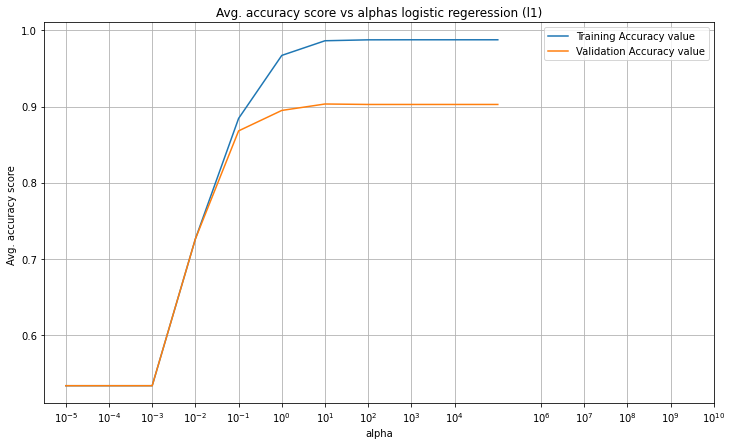

In [ ]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training Accuracy value")
plt.plot(param_range, avg_val_scores,label = "Validation Accuracy value")
plt.xlabel('alpha')
plt.ylabel('Avg. accuracy score ')
plt.title("Avg. accuracy score vs alphas logistic regeression (l1)")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks( [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10])
plt.show()

In [ ]:
best_alpha = param_range[np.argmax(avg_val_scores)]
print('best hyper parameter from 5 fold CV:',best_alpha)
best_hyper_parameter.append(best_alpha)

best hyper parameter from 5 fold CV: 10


In [ ]:
logistic_l1 = LogisticRegression(penalty='l1',solver='saga', C = best_alpha, random_state=1)

logistic_l1.fit(X_train, y_train)

y_pred_train =logistic_l1.predict(X_train)
y_pred_test=logistic_l1.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)


/home/22n0457/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
train_score = logistic_l1.score(X_train, y_train)

test_score = logistic_l1.score(X_test, y_test)

print('Train accuracy:',train_score)
print('Test accuracy:',test_score)

Train accuracy: 0.9861194930597466
Test accuracy: 0.8926417370325693


In [ ]:
from sklearn.svm import LinearSVC

#  Soft-margin SVM with L2 regularizer

In soft-margin SVM with L2 regularization, the regularization term is proportional to the square of the L2 norm of the weight vector. The regularization constant, denoted by C, controls the strength of the regularization, with larger values of C leading to a more strict boundary and smaller values allowing more misclassifications.

The range of C can vary depending on the problem and the size of the dataset. Generally, smaller values of C are preferred when there is a high degree of noise or outliers in the data, while larger values of C may be more appropriate when the data is cleaner or when there is a high degree of confidence in the model.  

so i've choosen regularizaion constant between 10^-5 to 10^5

In [ ]:
pipeline = make_pipeline(LinearSVC(penalty='l2'))
param_range = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e5]
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             cv=5,n_jobs=-1,
                                              param_name='linearsvc__C', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')

train scores: [[0.83251603 0.82987552 0.83062995 0.83440211 0.82956259]
 [0.88419464 0.87815919 0.87589589 0.87589589 0.87631976]
 [0.94794417 0.94304036 0.94492644 0.94718974 0.94494721]
 [0.9905696  0.98943795 0.98792908 0.98906073 0.99019608]
 [0.99811392 0.9977367  0.99849114 0.99849114 0.99811463]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.9984917 ]
 [0.99811392 0.99849114 0.99849114 0.99924557 0.99886878]
 [0.99886835 0.99698227 0.99698227 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99849114 0.9984917 ]
 [0.99886835 0.99811392 0.99811392 0.99924557 0.99886878]]
val scores: [[0.82202112 0.83710407 0.82051282 0.81598793 0.83081571]
 [0.84917044 0.87481146 0.85520362 0.84012066 0.85951662]
 [0.87028658 0.89894419 0.90648567 0.88386124 0.90332326]
 [0.88084465 0.88687783 0.92156863 0.90045249 0.90332326]
 [0.88687783 0.89291101 0.91855204 0.89441931 0.90634441]
 [0.87330317 0.88536953 0.90196078 0.89291101

In [ ]:
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.83139724 0.87809307 0.94560959 0.98943869 0.9981895  0.99886844
 0.99879302 0.99864211 0.99818945 0.99864214 0.99864211]
average val scores : [0.82528833 0.85576456 0.89258019 0.89861337 0.89982092 0.89046721
 0.88654427 0.88775227 0.88624307 0.88684684 0.88594186]


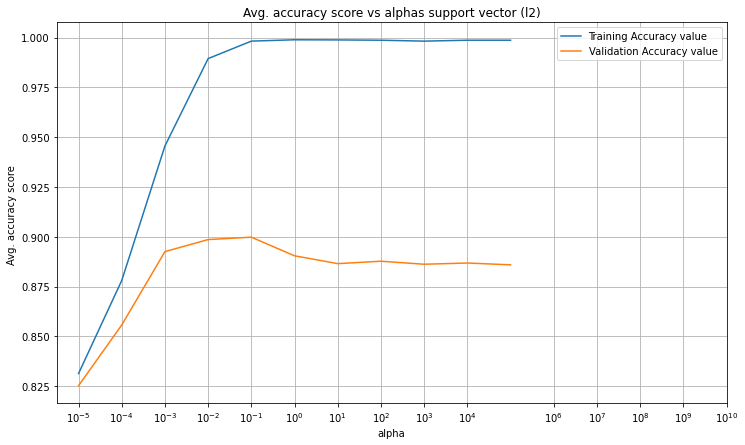

In [ ]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training Accuracy value")
plt.plot(param_range, avg_val_scores,label = "Validation Accuracy value")
plt.xlabel('alpha')
plt.ylabel('Avg. accuracy score ')
plt.title("Avg. accuracy score vs alphas support vector (l2)")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks( [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10])
plt.show()

In [ ]:
best_alpha = param_range[np.argmax(avg_val_scores)]
print('best_hyper_parameter from 5 fold CV:',best_alpha)
best_hyper_parameter.append(best_alpha)

best_hyper_parameter from 5 fold CV: 0.1


In [ ]:
linersvc_l2 =LinearSVC(penalty='l2',C = best_alpha)

linersvc_l2.fit(X_train, y_train)

y_pred_train =linersvc_l2.predict(X_train)
y_pred_test=linersvc_l2.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)


In [ ]:
train_score = linersvc_l2.score(X_train, y_train)

test_score = linersvc_l2.score(X_test, y_test)

print('Train accuracy:',train_score)
print('Test accuracy:',test_score)

Train accuracy: 0.9978877489438744
Test accuracy: 0.8962605548854041


# Soft-margin SVM with L1 regularizer

In soft-margin SVM with L1 regularization, the regularization constant, also known as the "C" parameter, controls the trade-off between achieving a low training error and a low complexity model. It determines the penalty for misclassifying training examples and the degree to which the decision boundary can deviate from being a linear separator, as well as encourages sparsity in the solution, i.e., some of the model coefficients are forced to be exactly zero.

The range of the C parameter in soft-margin SVM with L1 regularization depends on the dataset and the desired model complexity. Similar to the case of L2 regularization, a small value of C will result in a wider margin and a simpler model, but it may not classify all training examples correctly. On the other hand, a large value of C will result in a narrower margin and a more complex model, which can fit the training data better but may not generalize well to new data.

However, in contrast to L2 regularization, the range of C in L1 regularization depends on the sparsity level desired for the model. Specifically, as C decreases, more of the model coefficients are forced to be zero, resulting in a sparser model with fewer non-zero features. Thus, a smaller value of C is typically preferred in L1 regularization to obtain a sparser model with better interpretability and potentially improved generalization performance.

so i've choosen range of regression coefficient between 10^-50 to 10 ^5

In [ ]:
pipeline = make_pipeline(LinearSVC(penalty='l1', loss='squared_hinge',dual=False))
param_range = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e5]
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,n_jobs=-1,
                                             cv=5,
                                              param_name='linearsvc__C', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')

train scores: [[0.46623916 0.46661637 0.46661637 0.46661637 0.46644042]
 [0.46623916 0.46661637 0.46661637 0.46661637 0.46644042]
 [0.46623916 0.46661637 0.46661637 0.46661637 0.46644042]
 [0.82648057 0.81290079 0.82685779 0.82761222 0.82239819]
 [0.95737458 0.95511128 0.94945304 0.95209355 0.9581448 ]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]]
val scores: [[0.46757164 0.46606335 0.46606335 0.46606335 0.46676737]
 [0.46757164 0.46606335 0.46606335 0.46606335 0.46676737]
 [0.46757164 0.46606335 0.46606335 0.46606335 0.46676737]
 [0.82202112 0.82051282 0.82956259 0.78129713 0.82628399]
 [0.87481146 0.88386124 0.89894419 0.88687783 0.89123867]
 [0.86425339 0.87330317 0.89291101 0.89894419

In [ ]:
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.46650574 0.46650574 0.46650574 0.82324991 0.95443545 0.99886844
 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844]
average val scores : [0.46650581 0.46650581 0.46650581 0.81593553 0.88714668 0.88292163
 0.88926011 0.89499392 0.8883524  0.86994664 0.85817783]


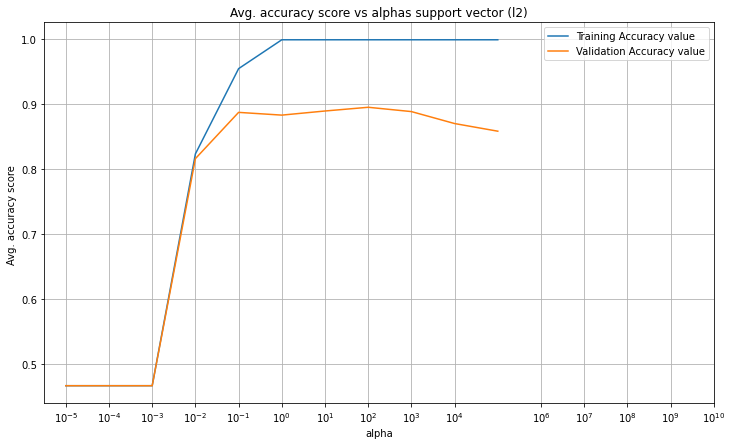

In [ ]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training Accuracy value")
plt.plot(param_range, avg_val_scores,label = "Validation Accuracy value")
plt.xlabel('alpha')
plt.ylabel('Avg. accuracy score ')
plt.title("Avg. accuracy score vs alphas support vector (l2)")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks( [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10])
plt.show()

In [ ]:
best_alpha = param_range[np.argmax(avg_val_scores)]
print('best_hyper_parameter from 5 fold CV:',best_alpha)
best_hyper_parameter.append(best_alpha)

best_hyper_parameter from 5 fold CV: 100


In [ ]:
linearsvc_l1 =LinearSVC(penalty='l1',loss='squared_hinge',dual=False,C = best_alpha)

linearsvc_l1.fit(X_train, y_train)
y_pred_train =linearsvc_l1.predict(X_train)
y_pred_test=linearsvc_l1.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)


/home/22n0457/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
train_score = linearsvc_l1.score(X_train, y_train)

test_score = linearsvc_l1.score(X_test, y_test)

print('Train accuracy:',train_score)
print('Test accuracy:',test_score)

Train accuracy: 0.9987929993964997
Test accuracy: 0.8890229191797346


#  Kernel SVM with RBF kernel

In kernel SVM with RBF (Radial Basis Function) kernel, the regularization constant, also known as the "C" parameter, controls the trade-off between achieving a low training error and a low complexity model. It determines the penalty for misclassifying training examples and the degree to which the decision boundary can deviate from being a linear separator.

The range of the C parameter in kernel SVM with RBF kernel depends on the dataset and the desired model complexity. Generally, a small value of C will result in a wider margin and a simpler model, but it may not classify all training examples correctly. On the other hand, a large value of C will result in a narrower margin and a more complex model, which can fit the training data better but may not generalize well to new data.

In practice, the range of C can be determined through cross-validation, where the dataset is split into training and validation sets. Different values of C are tested on the training set, and the performance of the resulting models is evaluated on the validation set. The optimal value of C is then chosen based on the validation performance.

The exact range of C can vary depending on the dataset and the SVM implementation used, but a common heuristic is to try values of C that are orders of magnitude apart, such as 1e-5,ie-4,0.001, 0.01, 0.1, 1, 10, 100, etc. It's also common to try a range of values below 1, as smaller values of C can help to avoid overfitting.

In [ ]:
pipeline = make_pipeline(SVC(kernel='rbf'))
param_range = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e5]
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             cv=5,n_jobs=-1,
                                              param_name='svc__C', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')

train scores: [[0.53376084 0.53338363 0.53338363 0.53338363 0.53355958]
 [0.53376084 0.53338363 0.53338363 0.53338363 0.53355958]
 [0.53376084 0.53338363 0.53338363 0.53338363 0.53355958]
 [0.53376084 0.53338363 0.53338363 0.53338363 0.53355958]
 [0.78725009 0.78687288 0.78725009 0.79177669 0.78657617]
 [0.96944549 0.96605055 0.9671822  0.96680498 0.96455505]
 [0.99660505 0.99509619 0.99585062 0.99622784 0.99622926]
 [0.99886835 0.99811392 0.99849114 0.99886835 0.9984917 ]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]]
val scores: [[0.53242836 0.53393665 0.53393665 0.53393665 0.53323263]
 [0.53242836 0.53393665 0.53393665 0.53393665 0.53323263]
 [0.53242836 0.53393665 0.53393665 0.53393665 0.53323263]
 [0.53242836 0.53393665 0.53393665 0.53393665 0.53323263]
 [0.79487179 0.76470588 0.78280543 0.760181   0.77794562]
 [0.87179487 0.89894419 0.90497738 0.89291101

In [ ]:
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.53349426 0.53349426 0.53349426 0.53349426 0.78794518 0.96680765
 0.99600179 0.99856669 0.99886844 0.99886844 0.99886844]
average val scores : [0.53349419 0.53349419 0.53349419 0.53349419 0.77610194 0.89318168
 0.89800732 0.897404   0.8971028  0.8971028  0.8971028 ]


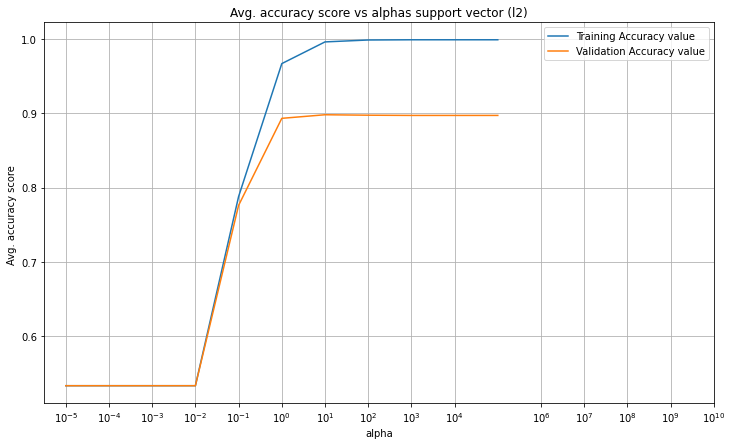

In [ ]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training Accuracy value")
plt.plot(param_range, avg_val_scores,label = "Validation Accuracy value")
plt.xlabel('alpha')
plt.ylabel('Avg. accuracy score ')
plt.title("Avg. accuracy score vs alphas support vector (l2)")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks( [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10])
plt.show()

In [ ]:
best_alpha = param_range[np.argmax(avg_val_scores)]
print('best_hyper_parameter from 5 fold CV:',best_alpha)
best_hyper_parameter.append(best_alpha)

best_hyper_parameter from 5 fold CV: 10


In [ ]:
svc_kernel =SVC(kernel='rbf', C = best_alpha)

svc_kernel.fit(X_train, y_train)

y_pred_train =svc_kernel.predict(X_train)
y_pred_test=svc_kernel.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)


In [ ]:
train_score = svc_kernel.score(X_train, y_train)

test_score =svc_kernel.score(X_test, y_test)

print('Train accuracy:',train_score)
print('Test accuracy:',test_score)

# KNN

NN or k-nearest neighbors is a machine learning algorithm used for classification and regression tasks. It works by finding the k closest data points in the training set to a new data point and making a prediction based on the labels or values of those k neighbors.

The parameter k in KNN represents the number of neighbors to consider when making a prediction. In general, larger values of k result in smoother decision boundaries and may reduce the impact of noise in the data, while smaller values of k may lead to more complex decision boundaries that fit the training data more closely.

The range of values for k that can be used depends on the size and complexity of the dataset and the desired level of model complexity. A common range for k is between 1 and 20, but this can vary depending on the application

In [ ]:
pipeline = make_pipeline(KNeighborsClassifier())
param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             cv=5,n_jobs=-1,
                                              param_name='kneighborsclassifier__n_neighbors', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')

train scores: [[0.99886835 0.99849114 0.99849114 0.99924557 0.9984917 ]
 [0.8106375  0.93436439 0.93625047 0.93889098 0.98152338]
 [0.84534138 0.97246322 0.96831384 0.97472652 0.97058824]
 [0.78083742 0.80799698 0.81176914 0.81591852 0.88310709]
 [0.7827235  0.81214636 0.83440211 0.83666541 0.86199095]
 [0.7499057  0.76273104 0.77895134 0.78008299 0.82616893]
 [0.75405507 0.76273104 0.77781969 0.77970577 0.83748115]
 [0.74160694 0.73783478 0.74688797 0.75103734 0.82051282]
 [0.76273104 0.74500189 0.75443229 0.75518672 0.80995475]
 [0.74839683 0.72689551 0.73745756 0.74122972 0.78846154]
 [0.7570728  0.74085251 0.7593361  0.76461713 0.79864253]
 [0.74575632 0.72840438 0.73670313 0.75028291 0.77714932]
 [0.74952848 0.75066013 0.7570728  0.75669559 0.78582202]
 [0.738212   0.73972086 0.74839683 0.74801962 0.76696833]
 [0.74009808 0.74462467 0.75556394 0.75254621 0.79411765]
 [0.7314221  0.72878159 0.74462467 0.74160694 0.78280543]
 [0.73406262 0.73783478 0.75179178 0.73783478 0.78544495]


In [ ]:
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.99871758 0.92033334 0.94628664 0.81992583 0.82558567 0.779568
 0.78235855 0.75957597 0.76546134 0.74848823 0.76410421 0.74765921
 0.7599558  0.74826353 0.75739011 0.74584815 0.74939378 0.73709713
 0.74003802 0.72925132]
average val scores : [0.82408716 0.77459821 0.79784054 0.76525361 0.77158982 0.75046867
 0.74684602 0.7368899  0.74232068 0.73266576 0.74111222 0.72753437
 0.73869804 0.72843388 0.7411145  0.72994901 0.73568281 0.72210223
 0.722706   0.71003176]


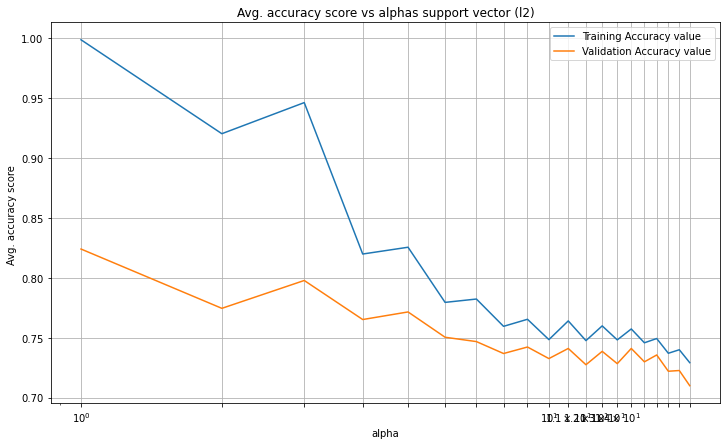

In [ ]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training Accuracy value")
plt.plot(param_range, avg_val_scores,label = "Validation Accuracy value")
plt.xlabel('alpha')
plt.ylabel('Avg. accuracy score ')
plt.title("Avg. accuracy score vs alphas support vector (l2)")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks(param_range)
plt.show()

In [ ]:
best_alpha = param_range[np.argmax(avg_val_scores)]
print('best_hyper_parameter from 5 fold CV:',best_alpha)
best_hyper_parameter.append(best_alpha)

best_hyper_parameter from 5 fold CV: 1


In [ ]:
knn =KNeighborsClassifier(n_neighbors=best_alpha)

knn.fit(X_train, y_train)
y_pred_train =knn.predict(X_train)
y_pred_test=knn.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)


In [ ]:
train_score = knn.score(X_train, y_train)

test_score = knn.score(X_test, y_test)

print('Train accuracy:',train_score)
print('Test accuracy:',test_score)

Train accuracy: 0.9984912492456246
Test accuracy: 0.8323281061519904


#  Decision tree

The min_weight_fraction_leaf parameter in decision trees is used to control the minimum fraction of the total sample weight (sum of instance weights) that must be present in a leaf node. This parameter is typically used for imbalanced datasets where one class has much fewer examples than another.

The min_weight_fraction_leaf parameter takes a float value between 0.0 and 0.5, where 0.0 means that there is no constraint on the minimum weight fraction, and 0.5 means that each leaf node must contain at least 50% of the total sample weight.

The appropriate value for min_weight_fraction_leaf depends on the specific dataset and problem at hand. In general, a smaller value of min_weight_fraction_leaf may lead to overfitting, especially if the dataset is already imbalanced. On the other hand, a larger value of min_weight_fraction_leaf may result in underfitting, where the decision tree is too simple and fails to capture important patterns in the data.

so i've taken value of parameter as 30 eqidistance value between 0 to 0.5

In [ ]:
pipeline = make_pipeline(DecisionTreeClassifier())
param_range = np.linspace(0,0.5,30)
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             cv=5,n_jobs=-1,
                                              param_name='decisiontreeclassifier__min_weight_fraction_leaf', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')

train scores: [[0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.84458695 0.82157676 0.81931347 0.83251603 0.836727  ]
 [0.79554885 0.78196907 0.76914372 0.78611845 0.77488688]
 [0.76235383 0.76009053 0.76084496 0.75631837 0.74698341]
 [0.74801962 0.74651075 0.74575632 0.74952848 0.74396682]
 [0.72387778 0.72764994 0.73217654 0.74273859 0.7326546 ]
 [0.72387778 0.72764994 0.73217654 0.74273859 0.7326546 ]
 [0.72387778 0.72802716 0.72538665 0.7336854  0.72285068]
 [0.7219917  0.72764994 0.72538665 0.7336854  0.72285068]
 [0.7219917  0.72764994 0.72538665 0.7336854  0.72285068]
 [0.7219917  0.72764994 0.72538665 0.7336854  0.72285068]
 [0.7219917  0.72764994 0.72538665 0.7336854  0.72285068]
 [0.7219917  0.72764994 0.72538665 0.7336854  0.72285068]
 [0.7219917  0.72764994 0.72538665 0.7336854  0.72285068]
 [0.7219917  0.72764994 0.72538665 0.7336854  0.72285068]
 [0.7219917  0.72764994 0.72538665 0.7336854  0.72285068]
 [0.63334591 0.72764994 0.72538665 0.7336854  0.72285068]


In [ ]:
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.99886844 0.83094404 0.78153339 0.75731822 0.7467564  0.73181949
 0.73181949 0.72676553 0.72631287 0.72631287 0.72631287 0.72631287
 0.72631287 0.72631287 0.72631287 0.72631287 0.70858372 0.6378999
 0.58750774 0.58750774 0.58750774 0.58750774 0.58750774 0.58826218
 0.58931821 0.58931821 0.57913338 0.53349426 0.53349426 0.53349426]
average val scores : [0.86179957 0.80417903 0.77520244 0.73898876 0.74170642 0.7281263
 0.7281263  0.7263168  0.7263168  0.7263168  0.7263168  0.7263168
 0.7263168  0.7263168  0.7263168  0.7263168  0.70610564 0.63790105
 0.58751077 0.58751077 0.58751077 0.58751077 0.58751077 0.58992404
 0.58932072 0.58932072 0.57423776 0.53349419 0.53349419 0.53349419]


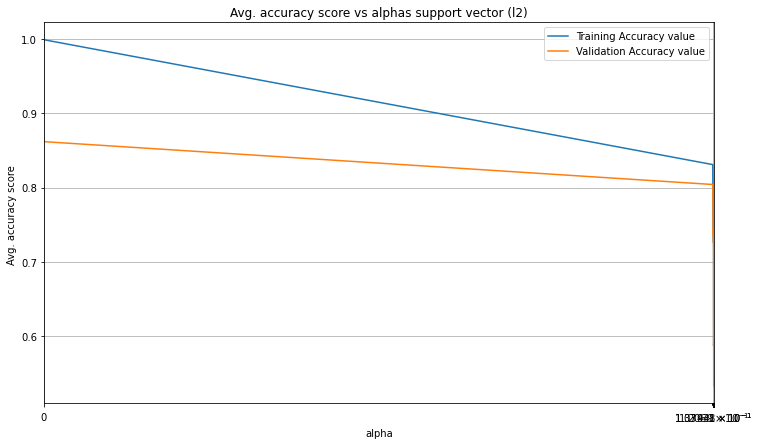

In [ ]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training Accuracy value")
plt.plot(param_range, avg_val_scores,label = "Validation Accuracy value")
plt.xlabel('alpha')
plt.ylabel('Avg. accuracy score ')
plt.title("Avg. accuracy score vs alphas support vector (l2)")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks(param_range)
plt.show()

In [ ]:
best_alpha = param_range[np.argmax(avg_val_scores)]
print('best_hyper_parameter from 5 fold CV:',best_alpha)
best_hyper_parameter.append(best_alpha)

best_hyper_parameter from 5 fold CV: 0.0


In [ ]:
decisiontreeclassifier =DecisionTreeClassifier(min_weight_fraction_leaf=best_alpha)

decisiontreeclassifier.fit(X_train, y_train)
y_pred_train =decisiontreeclassifier.predict(X_train)
y_pred_test=decisiontreeclassifier.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)


In [ ]:
train_score = decisiontreeclassifier.score(X_train, y_train)

test_score = decisiontreeclassifier.score(X_test, y_test)

print('Train accuracy:',train_score)
print('Test accuracy:',test_score)

Train accuracy: 0.9987929993964997
Test accuracy: 0.8769601930036188


# Random Forest

The n_estimators parameter in Random Forest algorithm refers to the number of decision trees in the ensemble. Random forest is an ensemble of decision trees that are trained independently on different subsets of the data. The final prediction is then made by aggregating the predictions of all the trees.

The n_estimators parameter controls the number of trees in the ensemble. Generally, increasing the number of trees will improve the performance of the model, up to a certain point where further increasing the number of trees will no longer have a significant impact on performance.

The appropriate value of n_estimators depends on the size and complexity of the dataset, as well as the desired level of accuracy and computational resources available. A common range of values for n_estimators is between 10 and 5000. However, in some cases, using several thousand trees can be useful for achieving higher accuracy.

so i've used range for n_estimator between 10 to 5000

In [ ]:
pipeline = make_pipeline(RandomForestClassifier())
param_range = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,
               310,320,330,340,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200,1300,1400,1500,1600,
               1700,1800,1900,2000,2500,3000,3500,4000,4500,5000]
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             cv=5,n_jobs=-1,
                                              param_name='randomforestclassifier__n_estimators', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')

/home/22n0457/.local/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


train scores: [[0.99660505 0.99471897 0.99434176 0.99434176 0.99509804]
 [0.99811392 0.99735949 0.99735949 0.99698227 0.99736048]
 [0.9977367  0.99849114 0.99811392 0.99924557 0.99811463]
 [0.99886835 0.99811392 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.9984917 ]
 [0.99886835 0.99849114 0.99849114 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]
 [0.99886835 0.99849114 0.99886835 0.99924557 0.99886878]


In [ ]:
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.99502112 0.99743513 0.99834039 0.99879299 0.99886844 0.99886844
 0.99879302 0.99879299 0.99886844 0.99886844 0.99886844 0.99886844
 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844
 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844
 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844
 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844
 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844
 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844
 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844
 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844
 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844 0.99886844]
average val scores : [0.87809873 0.89016418 0.88986753 0.8880512  0.89589889 0.89378956
 0.8910728  0.89982229 0.89771067 0.89801142 0.90042697 0.89831399
 0.89952154 0.89619964 0.89650358 0.89620238 0.89891731 0.89921806
 0.90133104 0.901

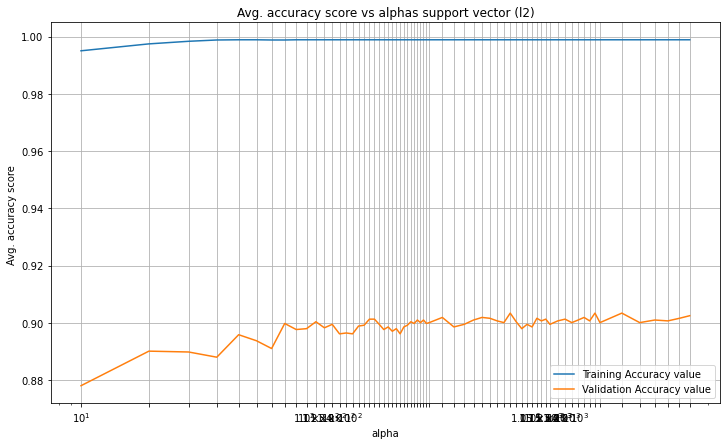

In [ ]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training Accuracy value")
plt.plot(param_range, avg_val_scores,label = "Validation Accuracy value")
plt.xlabel('alpha')
plt.ylabel('Avg. accuracy score ')
plt.title("Avg. accuracy score vs alphas support vector (l2)")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks(param_range)
plt.show()

In [ ]:
best_alpha = param_range[np.argmax(avg_val_scores)]
print('best_hyper_parameter from 5 fold CV:',best_alpha)
best_hyper_parameter.append(best_alpha)

best_hyper_parameter from 5 fold CV: 2500


In [ ]:
randomforest =RandomForestClassifier(n_estimators=best_alpha)

randomforest.fit(X_train, y_train)
y_pred_train =randomforest.predict(X_train)
y_pred_test=randomforest.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)

In [ ]:
train_score = randomforest.score(X_train, y_train)

test_score = randomforest.score(X_test, y_test)

print('Train accuracy:',train_score)
print('Test accuracy:',test_score)

Train accuracy: 0.9987929993964997
Test accuracy: 0.8962605548854041


In [ ]:
accuracy_train=[]
recall_train=[]
precision_train=[]
f1_score_train=[]
specifity_train=[]
senstivity_train=[]
accuracy_test=[]
recall_test=[]
precision_test=[]
f1_score_test=[]
specifity_test=[]
senstivity_test=[]
best_hyper_parameter=[]
def score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test):
  accuracy_train.append(accuracy_score(y_train,y_pred_train))
  recall_train.append(recall_score(y_train,y_pred_train))
  precision_train.append(precision_score(y_train,y_pred_train))
  f1_score_train.append(f1_score(y_train,y_pred_train))
  tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
  specificity1 = tn / (tn+fp)
  senstivity1= tp / (tp + fn)
  specifity_train.append(specificity1)
  senstivity_train.append(senstivity1)
  accuracy_test.append(accuracy_score(y_test,y_pred_test))
  recall_test.append(recall_score(y_test,y_pred_test))
  precision_test.append(precision_score(y_test,y_pred_test))
  f1_score_test.append(f1_score(y_test,y_pred_test))
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
  specificity1 = tn / (tn+fp)
  senstivity1= tp / (tp + fn)
  specifity_test.append(specificity1)
  senstivity_test.append(senstivity1)

In [ ]:
logistic_l2 = LogisticRegression(penalty='l2', C = 0.1, random_state=1)
logistic_l2.fit(X_train, y_train)
y_pred_train =logistic_l2.predict(X_train)
y_pred_test=logistic_l2.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)

In [ ]:
logistic_l1 = LogisticRegression(penalty='l1',solver='saga', C = 10, random_state=1)

logistic_l1.fit(X_train, y_train)

y_pred_train =logistic_l1.predict(X_train)
y_pred_test=logistic_l1.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)


/home/22n0457/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
linersvc_l2 =LinearSVC(penalty='l2',C = 0.1)

linersvc_l2.fit(X_train, y_train)

y_pred_train =linersvc_l2.predict(X_train)
y_pred_test=linersvc_l2.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)

In [ ]:
linearsvc_l1 =LinearSVC(penalty='l1',loss='squared_hinge',dual=False,C = 100)

linearsvc_l1.fit(X_train, y_train)
y_pred_train =linearsvc_l1.predict(X_train)
y_pred_test=linearsvc_l1.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)


/home/22n0457/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
svc_kernel =SVC(kernel='rbf', C = 10)

svc_kernel.fit(X_train, y_train)

y_pred_train =svc_kernel.predict(X_train)
y_pred_test=svc_kernel.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)


In [ ]:
knn =KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)
y_pred_train =knn.predict(X_train)
y_pred_test=knn.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)

In [ ]:
decisiontreeclassifier =DecisionTreeClassifier(min_weight_fraction_leaf=0)

decisiontreeclassifier.fit(X_train, y_train)
y_pred_train =decisiontreeclassifier.predict(X_train)
y_pred_test=decisiontreeclassifier.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)


In [ ]:
randomforest =RandomForestClassifier(n_estimators=2500)

randomforest.fit(X_train, y_train)
y_pred_train =randomforest.predict(X_train)
y_pred_test=randomforest.predict(X_test)
score_update(X_train,y_train,X_test,y_test,y_pred_train,y_pred_test)

In [ ]:
algo=[' Logistic regression with L2 regularizer',' Logistic regression with L1 regularizer',' Soft-margin SVM with L2 regularizer',' Soft-margin SVM with L1 regularizer',' Kernel SVM with RBF kernel','KNN',' Decision tree',' Random forest']

In [ ]:
df=pd.DataFrame({'algorithm':algo,'accuracy_train':accuracy_train,'recall_train':recall_train,'precision train':precision_train,
              'f1 score train':f1_score_train,'specifity train':specifity_train,'senstivity_train': senstivity_train,
              'accuracy test':accuracy_test,'recall test': recall_test,'precision test':precision_test,'f1 score test':f1_score_test,
              'specifity test': specifity_test,'senstivity test':senstivity_test,'best hyperparameter':[0.1,10,0.1,100,10,1,0,2500]})

here we can see that Kernel SVM with RBF kernel is outperform among all algorithm also here all algorithm predict better since all matrices value is >0.85 in term of precision and specifity for test data Soft-margin SVM with L2 regularizer perform better than all algorithm 

in term of senstivity test random forest perform better

In [ ]:
df

algorithm  accuracy_train  recall_train  \
0   Logistic regression with L2 regularizer        0.987628      0.994344   
1   Logistic regression with L1 regularizer        0.986119      0.993778   
2       Soft-margin SVM with L2 regularizer        0.997888      0.998869   
3       Soft-margin SVM with L1 regularizer        0.998793      0.998869   
4                Kernel SVM with RBF kernel        0.995474      0.996606   
5                                       KNN        0.998491      0.997738   
6                             Decision tree        0.998793      0.998869   
7                             Random forest        0.998793      0.999434   

   precision train  f1 score train  specifity train  senstivity_train  \
0         0.982672        0.988473         0.979948          0.994344   
1         0.980469        0.987079         0.977361          0.993778   
2         0.997177        0.998022         0.996766          0.998869   
3         0.998869        0.998869         0.998706          0.998869   
4         0.994918        0.995762         0.994179          0.996606   
5         0.999433        0.998585         0.999353          0.997738   
6         0.998869        0.998869         0.998706          0.998869   
7         0.998305        0.998869         0.998060          0.999434   

   accuracy test  recall test  precision test  f1 score test  specifity test  \
0       0.891435     0.938914        0.868201       0.902174        0.837209   
1       0.892642     0.936652        0.871579       0.902944        0.842377   
2       0.896261     0.925339        0.885281       0.904867        0.863049   
3       0.876960     0.902715        0.871179       0.886667        0.847545   
4       0.903498     0.943439        0.883475       0.912473        0.857881   
5       0.832328     0.884615        0.816284       0.849077        0.772610   
6       0.862485     0.886878        0.859649       0.873051        0.834625   
7       0.895054     0.959276        0.860041       0.906952        0.821705   

   senstivity test  best hyperparameter  
0         0.938914                  0.1  
1         0.936652                 10.0  
2         0.925339                  0.1  
3         0.902715                100.0  
4         0.943439                 10.0  
5         0.884615                  1.0  
6         0.886878                  0.0  
7         0.959276               2500.0

In [ ]:
from tabulate import tabulate
print(tabulate(df.to_numpy(),headers=df.columns))

algorithm                                  accuracy_train    recall_train    precision train    f1 score train    specifity train    senstivity_train    accuracy test    recall test    precision test    f1 score test    specifity test    senstivity test    best hyperparameter
---------------------------------------  ----------------  --------------  -----------------  ----------------  -----------------  ------------------  ---------------  -------------  ----------------  ---------------  ----------------  -----------------  ---------------------
Logistic regression with L2 regularizer          0.987628        0.994344           0.982672          0.988473           0.979948            0.994344         0.891435       0.938914          0.868201         0.902174          0.837209           0.938914                    0.1
Logistic regression with L1 regularizer          0.986119        0.993778           0.980469          0.987079           0.977361            0.993778         0.892642   

Yes, L1 regularizers used in logistic regression and soft-margin SVM can result in sparse models compared to L2 regularizers. The L1 regularization technique adds a penalty term to the cost function that is proportional to the sum of the absolute values of the model parameters (i.e., L1 norm), while L2 regularization adds a penalty term proportional to the sum of the squares of the model parameters (i.e., L2 norm).

In the case of L1 regularization, this penalty term encourages the model to have many zero-valued parameters, resulting in sparse models where many of the features have no impact on the output. In contrast, the L2 regularization technique tends to distribute the weight more evenly across all features, resulting in non-sparse models.

Regarding the performance of the models obtained using L1 and L2 regularizers, L1 regularization tends to perform better when dealing with high-dimensional data, where the number of features is much larger than the number of observations. This is because L1 regularization tends to select only the most informative features, leading to a more robust and interpretable model.

On the other hand, L2 regularization often performs better when dealing with low-dimensional data, where the number of features is not much larger than the number of observations. This is because L2 regularization tends to produce smoother models that capture the overall trend of the data, leading to better generalization performance.

Therefore, practitioners should consider the nature of their data when choosing between L1 and L2 regularization techniques. If the data is high-dimensional, with many irrelevant features, L1 regularization should be used to obtain a sparse and interpretable model. If the data is low-dimensional, with a small number of features, L2 regularization should be used to produce a smooth model that captures the overall trend of the data

but in our question L2 norm perform better than L1 norm for both logistic regression and soft margin svm